# FUEL CONSUMPTION 2000-2022


 The notebook appears to be focused on analyzing fuel consumption data from 2000 to 2022. The main goal is likely to explore patterns, trends, and relationships between different variables such as vehicle make, model, fuel consumption, and CO2 emissions.

We're going to take the following approach:

1.Problem definition

2.Data

3.Evaluation

4.Features

5.Modelling

6.Experimentation




## 1.Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have Alzhemer's disease?

## 2.Data

The dataset utilized for this project was sourced from Kaggle.

# 3.EVALUATION

If we can reach 99% accuracy at predicting Co2 emission in vehicles during the proof of concept, we'll pursue the project.

## FEATURES

*Model

4WD/4X4 = Four-wheel drive

AWD = All-wheel drive

CNG = Compressed natural gas

FFV = Flexible-fuel vehicle

NGV = Natural gas vehicle

High output engine that provides more power than the standard engine of the same size

*Transmission

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears

*Fuel Type

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural Gas

*Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg).
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating




## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### Load data

In [5]:
df=pd.read_csv(r"C:\Users\HP\Desktop\task\regression\Fuel_Consumption_2000-2022.csv")
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


## Dta Exploration(Exploratory data analysis)

In [6]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [7]:
df.tail()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236
22555,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252


In [8]:
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [9]:
df.isna().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [10]:
df.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [14]:
df['MODEL'].value_counts()

MODEL
JETTA                 89
MUSTANG               88
RANGER                61
SENTRA                58
TACOMA                57
                      ..
NX 350 AWD             1
NX 350 AWD F SPORT     1
NX 350h AWD            1
Ghibli GT              1
Ghibli Modena          1
Name: count, Length: 4242, dtype: int64

In [15]:
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
SUV                         2640
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  827
MINICOMPACT                  783
STATION WAGON - SMALL        737
Mid-size                     660
SUV: Standard                608
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
Subcompact                   451
Full-size                    417
PICKUP TRUCK - SMALL         403
MINIVAN                      366
STATION WAGON - MID-SIZE     343
VAN - CARGO                  332
Two-seater                   313
VAN - PASSENGER              287
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       52
Station wagon: Mid-size      

In [16]:
df['VEHICLE CLASS'].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'Compact', 'SUV: Small',
       'Two-seater', 'Mid-size', 'Minicompact', 'Subcompact',
       'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'], dtype=object)

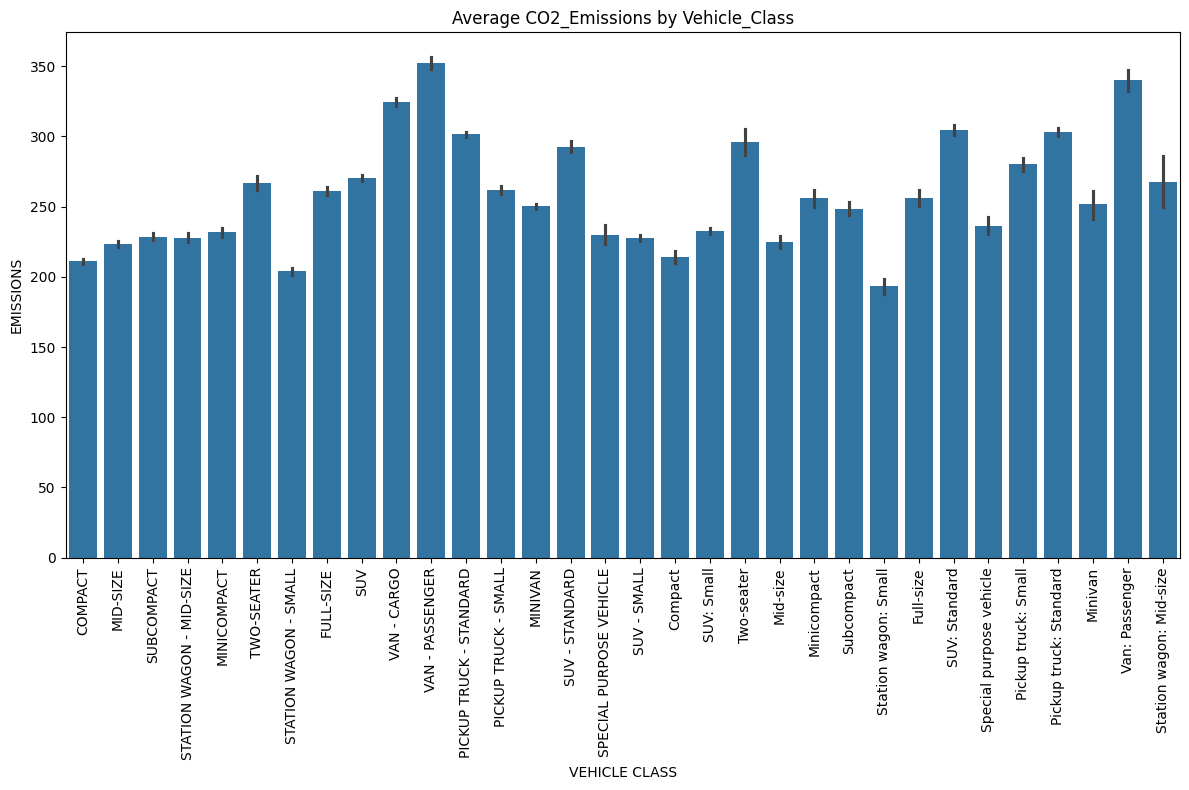

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='VEHICLE CLASS', y='EMISSIONS')
plt.title('Average CO2_Emissions by Vehicle_Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

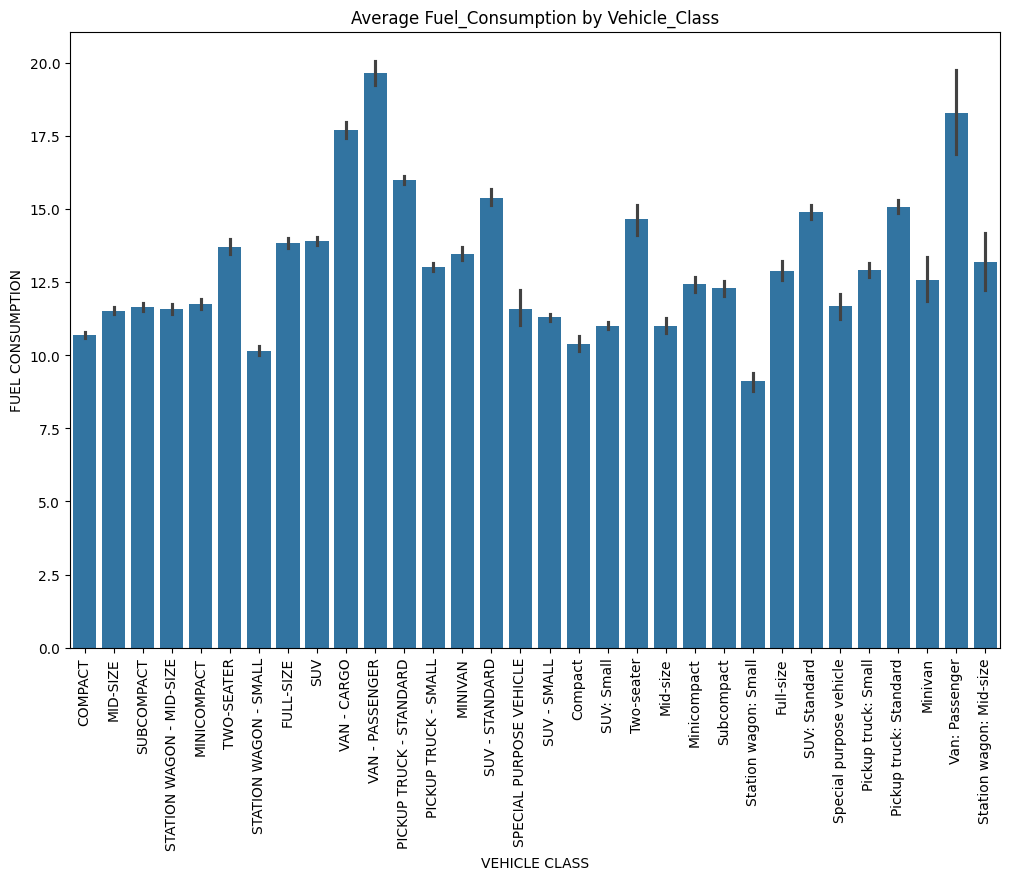

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='VEHICLE CLASS', y='FUEL CONSUMPTION')
plt.title('Average Fuel_Consumption by Vehicle_Class')
plt.xticks(rotation=90)
plt.show()

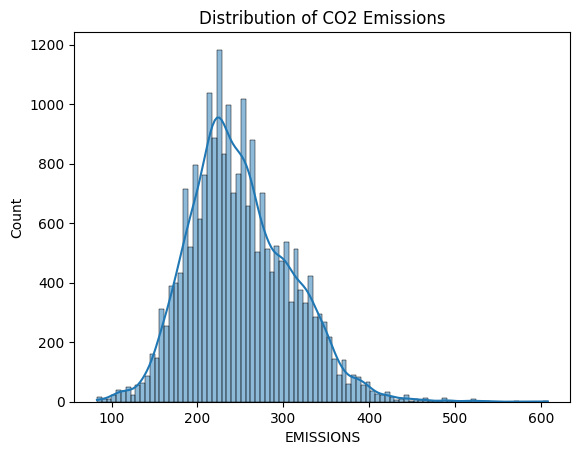

In [19]:
sns.histplot(data=df, x='EMISSIONS', kde=True)
plt.title('Distribution of CO2 Emissions')
plt.show()

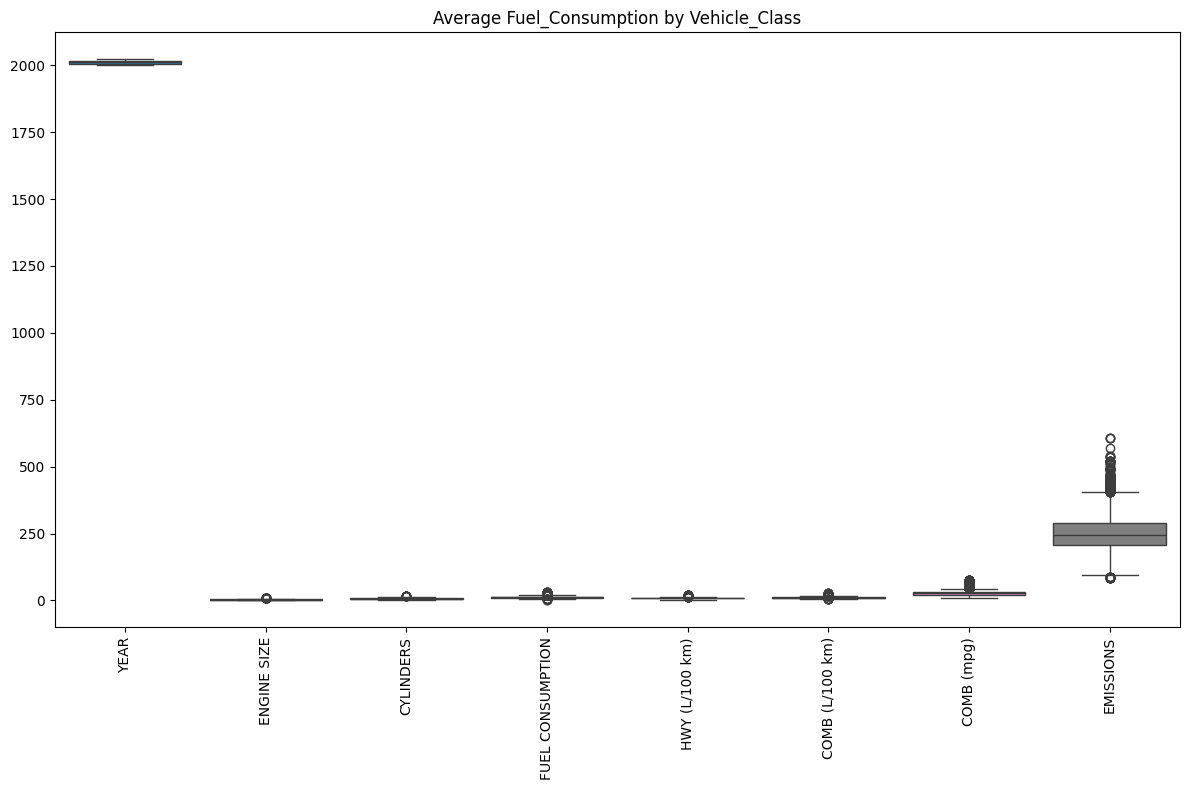

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Average Fuel_Consumption by Vehicle_Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

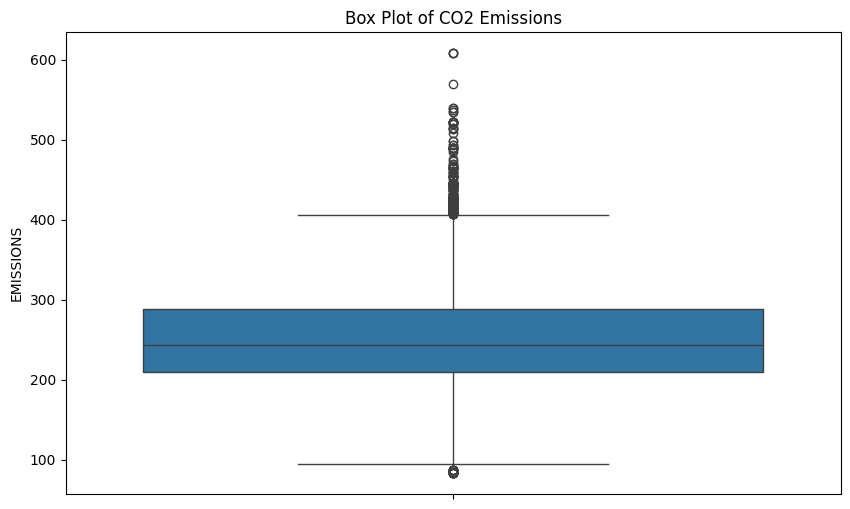

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['EMISSIONS'])
plt.title('Box Plot of CO2 Emissions')
plt.show()

In [22]:
Q1 = df['EMISSIONS'].quantile(0.25)
Q3 = df['EMISSIONS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [23]:
df= df[(df['EMISSIONS'] >= lower_bound) & (df['EMISSIONS'] <= upper_bound)]
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [24]:
# sns.pairplot(df,kind='reg')
# plt.title('Pair Plot', y=1.02)
# plt.show()

In [25]:
df['TRANSMISSION'].value_counts()

TRANSMISSION
A4      3485
AS6     2798
M6      2572
M5      2097
A6      1941
AS8     1725
A5      1416
AS5      865
AV       807
A8       787
AM7      651
AS7      605
A9       528
AS10     335
A7       275
AS4      245
AM6      214
AM8      164
A10      162
AV7      143
AV6      137
M7       129
AS9      110
AV8       78
AV10      25
A3        24
AV1        8
AM5        6
AM9        5
M4         1
Name: count, dtype: int64

In [26]:
df['TRANSMISSION'].unique()

array(['A4', 'M5', 'AS5', 'AS4', 'M6', 'A5', 'A3', 'AV', 'AS6', 'A6',
       'AM6', 'A7', 'AM7', 'AS7', 'AS8', 'M4', 'A8', 'M7', 'AV7', 'AV8',
       'AV6', 'AM5', 'A9', 'AS9', 'AM8', 'AM9', 'AS10', 'A10', 'AV10',
       'AV1'], dtype=object)

In [27]:
# transmission_mapping = {
#     'AV7': 'Automated Manual',
#     'AV1':'Automated Manual',
#     'AV6': 'Automated Manual',
#     'AV8': 'Automated Manual',
#     'AV': 'Automated Manual',
#     'AV10': 'Automated Manual',
#     'AS6': 'Automatic',
#     'AS8': 'Automatic',
#     'AS9': 'Automatic',
#     'AS10': 'Automatic',
#     'AS4': 'Automatic',
#     'AS7': 'Automatic',
#     'AS5': 'Automatic',
#     'A3':'Automatic',
#     'A4':'Manual',
#     'A5': 'Manual',
#     'A6': 'Manual',
#     'A7': 'Manual',
#     'A8': 'Manual',
#     'A9': 'Manual',
#     'A10': 'Manual',
#     'AM5': 'Automated Manual',
#     'AM6': 'Automated Manual',
#     'AM7': 'Automated Manual',
#     'AM8': 'Automated Manual',
#     'AM9': 'Automated Manual',
#     'M6': 'Manual',
#     'M7': 'Manual',
#     'M5': 'Manual'
# }
# # df['transmission_category'] = df['TRANSMISSION'].map(transmission_mapping)

In [28]:
def categorize_transmission(transmission):
    if transmission in ['AV7', 'AV6', 'AV8', 'AV', 'AV10', 'AM5', 'AM6', 'AM7', 'AM8', 'AM9']:
        return 'Automated Manual'
    if transmission in ['AS6', 'AS8', 'AS9', 'AS10', 'AS4', 'AS7', 'AS5']:
        return 'Automatic'
    if transmission in ['A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A4', 'M6', 'M7', 'M5']:
        return 'Manual'
    # else:
        # return 'Unknown'
df['Transmission_Category'] = df['TRANSMISSION'].apply(categorize_transmission)

C:\Users\HP\AppData\Local\Temp\ipykernel_15860\1305783100.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission_Category'] = df['TRANSMISSION'].apply(categorize_transmission)


In [29]:

vehicle_class_mapping = {
    'SUV': 'SUV',
    'SUV: Small': 'SUV',
    'SUV - SMALL': 'SUV',
    'SUV: Standard': 'SUV',
    'SUV - STANDARD': 'SUV',
    'COMPACT': 'Compact',
    'Compact': 'Compact',
    'MID-SIZE': 'Mid-size',
    'Mid-size': 'Mid-size',
    'PICKUP TRUCK - STANDARD': 'Pickup Truck',
    'Pickup truck: Standard': 'Pickup Truck',
    'PICKUP TRUCK - SMALL': 'Pickup Truck',
    'Pickup truck: Small': 'Pickup Truck',
    'SUBCOMPACT': 'Subcompact',
    'Subcompact': 'Subcompact',
    'FULL-SIZE': 'Full-size',
    'Full-size': 'Full-size',
    'MINICOMPACT': 'Minicompact',
    'Minicompact': 'Minicompact',
    'STATION WAGON - SMALL': 'Station Wagon',
    'Station wagon: Small': 'Station Wagon',
    'STATION WAGON - MID-SIZE': 'Station Wagon',
    'Station wagon: Mid-size': 'Station Wagon',
    'MINIVAN': 'Minivan',
    'Van - Passenger': 'Van',
    'VAN - PASSENGER': 'Van',
    'VAN - CARGO': 'Van',
    'Special purpose vehicle': 'Special Purpose Vehicle',
    'SPECIAL PURPOSE VEHICLE': 'Special Purpose Vehicle',
    'Van: Passenger': 'Van'
}

# Apply mapping
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace(vehicle_class_mapping)

# Count occurrences
grouped_counts = df['VEHICLE CLASS'].value_counts()

print(grouped_counts)


VEHICLE CLASS
SUV                        5497
Compact                    3121
Mid-size                   2921
Pickup Truck               2700
Subcompact                 1998
Full-size                  1497
Station Wagon              1264
Minicompact                 993
TWO-SEATER                  936
Van                         604
Minivan                     408
Two-seater                  285
Special Purpose Vehicle     114
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_15860\4228688315.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace(vehicle_class_mapping)


In [30]:
def categorize_vehicle_class(vehicle_class):
    suvs=['SUV - SMALL', 'SUV - STANDARD','SUV: small','SUV: Standard','SUV']
    cars=['MID-SIZE','Mid-size', 'COMPACT','Compact','Minicompact', 'SUBCOMPACT','Subcompact', 'FULL-SIZE','Full-size', 'TWO-SEATER','Two-seater', 'MINICOMPACT', 'STATION WAGON - SMALL','Station wagon -small', 'STATION WAGON - MID-SIZE','Station wagon - mid-size']
    trucks=['PICKUP TRUCK - STANDARD','Pickup truck : standard' ,'PICKUP TRUCK - SMALL','Pickup truck:small']
    others=['VAN - PASSENGER','Van - passenger' 'SPECIAL PURPOSE VEHICLE','Special purpose vehicle', 'MINIVAN', 'VAN - CARGO']

    if vehicle_class in suvs:
        return 'SUVs'
    elif vehicle_class in cars:
        return 'Cars'
    elif vehicle_class in trucks:
        return 'Trucks'
    else:
        return 'Others'
df['Vehicle Class Category'] = df['VEHICLE CLASS'].apply(categorize_vehicle_class)

C:\Users\HP\AppData\Local\Temp\ipykernel_15860\279428051.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vehicle Class Category'] = df['VEHICLE CLASS'].apply(categorize_vehicle_class)


In [31]:
df['Vehicle Class Category'].value_counts()

Vehicle Class Category
Cars      11751
SUVs       5497
Others     5090
Name: count, dtype: int64

In [32]:
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,Transmission_Category,Vehicle Class Category
0,2000,ACURA,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,Manual,Cars
1,2000,ACURA,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,Manual,Cars
2,2000,ACURA,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,Automatic,Cars
3,2000,ACURA,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,Manual,Cars
4,2000,ACURA,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,Manual,Cars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,Automatic,SUVs
22552,2022,Volvo,XC60 B5 AWD,SUV,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,Automatic,SUVs
22553,2022,Volvo,XC60 B6 AWD,SUV,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,Automatic,SUVs
22554,2022,Volvo,XC90 T5 AWD,SUV,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,Automatic,SUVs


In [33]:
df['Vehicle Class Category'].value_counts()

Vehicle Class Category
Cars      11751
SUVs       5497
Others     5090
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22ae67e32f0>,
 [Text(-0.08993656841839477, 1.0963172048550198, 'Cars'),
  Text(-0.6516096173325494, -0.8862307298890785, 'SUVs'),
  Text(0.8299877573977998, -0.7218866410800044, 'Others')],
 [Text(-0.04905631004639715, 0.5979912026481926, '53%'),
  Text(-0.35542342763593604, -0.4833985799394973, '25%'),
  Text(0.45272059494425443, -0.3937563496800024, '23%')])

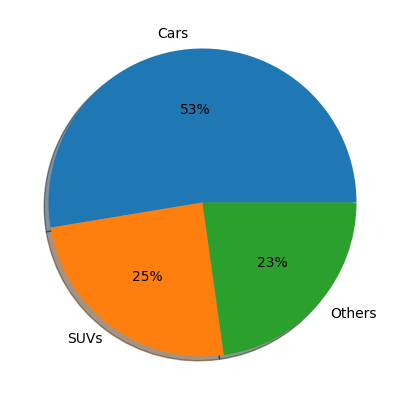

In [34]:
plt.figure(figsize=(5,5))
plt.pie(x=df['Vehicle Class Category'].value_counts(),labels=['Cars','SUVs','Others'],autopct="%1.f%%",shadow=True)

In [35]:
df['Transmission_Category'].value_counts()

Transmission_Category
Manual              13392
Automatic            6683
Automated Manual     2230
Name: count, dtype: int64

Text(0.5, 1.0, 'count plot of Transmission category')

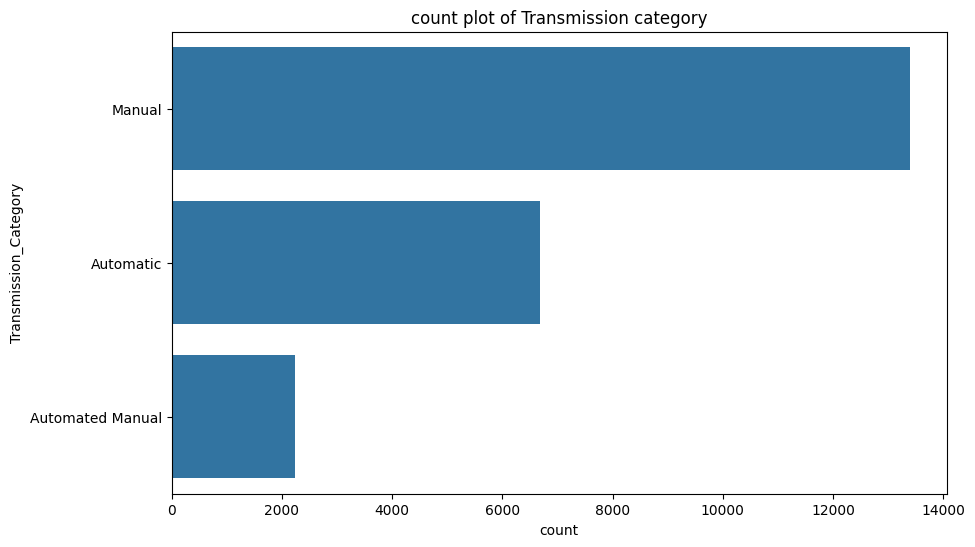

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(df.Transmission_Category)
plt.title(label='count plot of Transmission category')

In [37]:
le_transmission = LabelEncoder()
df['Transmission_Category']=le_transmission.fit_transform(df['Transmission_Category'])
le_vehicle_class = LabelEncoder()
df['Vehicle Class Category']=le_vehicle_class.fit_transform(df['Vehicle Class Category'])
le_fuel=LabelEncoder()
df['FUEL']=le_fuel.fit_transform(df['FUEL'])
df


C:\Users\HP\AppData\Local\Temp\ipykernel_15860\3053848815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission_Category']=le_transmission.fit_transform(df['Transmission_Category'])
C:\Users\HP\AppData\Local\Temp\ipykernel_15860\3053848815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vehicle Class Category']=le_vehicle_class.fit_transform(df['Vehicle Class Category'])
C:\Users\HP\AppData\Local\Temp\ipykernel_15860\3053848815.py:6: SettingWithCopyWarning: 
A value is trying to be se

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,Transmission_Category,Vehicle Class Category
0,2000,ACURA,1.6EL,Compact,1.6,4,A4,3,9.2,6.7,8.1,35,186,2,0
1,2000,ACURA,1.6EL,Compact,1.6,4,M5,3,8.5,6.5,7.6,37,175,2,0
2,2000,ACURA,3.2TL,Mid-size,3.2,6,AS5,4,12.2,7.4,10.0,28,230,1,0
3,2000,ACURA,3.5RL,Mid-size,3.5,6,A4,4,13.4,9.2,11.5,25,264,2,0
4,2000,ACURA,INTEGRA,Subcompact,1.8,4,A4,3,10.0,7.0,8.6,33,198,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV,2.0,4,AS8,4,10.7,7.7,9.4,30,219,1,2
22552,2022,Volvo,XC60 B5 AWD,SUV,2.0,4,AS8,4,10.5,8.1,9.4,30,219,1,2
22553,2022,Volvo,XC60 B6 AWD,SUV,2.0,4,AS8,4,11.0,8.7,9.9,29,232,1,2
22554,2022,Volvo,XC90 T5 AWD,SUV,2.0,4,AS8,4,11.5,8.4,10.1,28,236,1,2


In [38]:
df.drop(columns=['MAKE','MODEL','VEHICLE CLASS','TRANSMISSION','YEAR','FUEL'],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15860\4192877265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['MAKE','MODEL','VEHICLE CLASS','TRANSMISSION','YEAR','FUEL'],inplace=True)


Text(0.5, 1.0, 'Correlation Matrix')

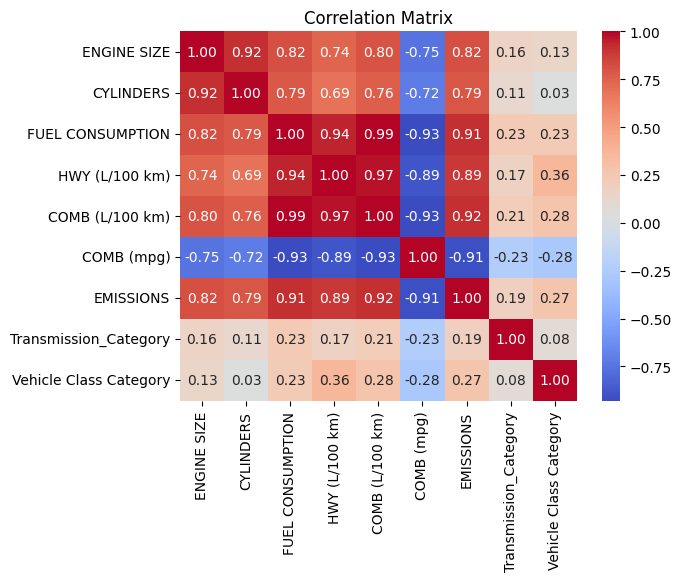

In [39]:
cor=df.corr()
sns.heatmap(cor,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

In [40]:
df

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,Transmission_Category,Vehicle Class Category
0,1.6,4,9.2,6.7,8.1,35,186,2,0
1,1.6,4,8.5,6.5,7.6,37,175,2,0
2,3.2,6,12.2,7.4,10.0,28,230,1,0
3,3.5,6,13.4,9.2,11.5,25,264,2,0
4,1.8,4,10.0,7.0,8.6,33,198,2,0
...,...,...,...,...,...,...,...,...,...
22551,2.0,4,10.7,7.7,9.4,30,219,1,2
22552,2.0,4,10.5,8.1,9.4,30,219,1,2
22553,2.0,4,11.0,8.7,9.9,29,232,1,2
22554,2.0,4,11.5,8.4,10.1,28,236,1,2


In [41]:
x=df.drop(columns=['EMISSIONS'])
y=df['EMISSIONS']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [43]:
minmax=MinMaxScaler()
x_train_scaled=minmax.fit_transform(x_train)
x_test_scaled=minmax.transform(x_test)

In [44]:
model=LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred=model.predict(x_test_scaled)
y_pred_train=model.predict(x_train_scaled)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1.Logistic Regression
2.K-Random Forest Regressor
3.Random Forest Classifier
4.Support Vector Machine
5.Decision TreeRegressor

In [45]:
mlr=LinearRegression()
rf=RandomForestRegressor()
svr=SVR()
dt=DecisionTreeRegressor()


In [46]:
model_names = ['Multiple Linear Regression', 'RandomForest','Support Vector Regressor', 'DecisionTree' ]
train_scores = []
mae_values = []
mse_values = []
rmse_values = []
r_squared_values = []

## Model comparison

In [47]:
models=[mlr,rf,svr,dt]
for model in models:
    model.fit(x_train_scaled,y_train)
    train_predictions = model.predict(x_train_scaled)
    train_score = r2_score(y_train,train_predictions)
    y_pred=model.predict(x_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    train_scores.append(train_score)
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r_squared_values.append(r_squared)

In [48]:
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Train R2 Score': train_scores,
    'MAE': mae_values,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R-squared': r_squared_values
})
print(metrics_df)

                        Model  Train R2 Score        MAE         MSE  \
0  Multiple Linear Regression        0.895133  11.479368  326.709766   
1                RandomForest        0.998279   1.848971   47.746471   
2    Support Vector Regressor        0.915098   6.164539  265.683073   
3                DecisionTree        0.999745   1.529384   63.799898   

        RMSE  R-squared  
0  18.075115   0.895475  
1   6.909882   0.984724  
2  16.299788   0.915000  
3   7.987484   0.979588  


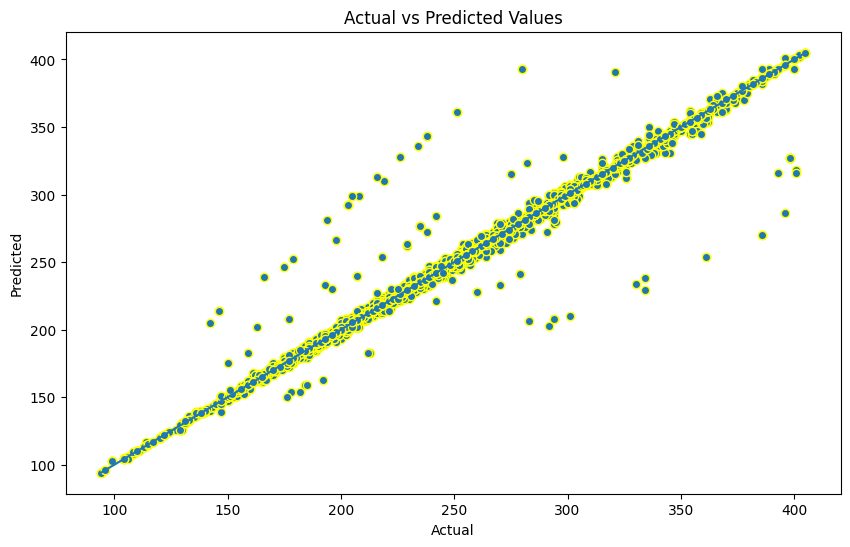

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred,edgecolors=(1,1,0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [50]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [51]:
model=pickle.load(open('C:/Users/HP/Desktop/task/regression/model.pkl','rb'))
model

DecisionTreeRegressor()

In [52]:
df.columns

Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS', 'Transmission_Category',
       'Vehicle Class Category'],
      dtype='object')

In [53]:
df.dtypes

ENGINE SIZE               float64
CYLINDERS                   int64
FUEL CONSUMPTION          float64
HWY (L/100 km)            float64
COMB (L/100 km)           float64
COMB (mpg)                  int64
EMISSIONS                   int64
Transmission_Category       int64
Vehicle Class Category      int64
dtype: object

In [54]:
with open('minimax.pkl', 'wb') as file:
    pickle.dump(minmax, file)
